I. Reading in Data

Read in two .wav audio files to compare. Both are the original recorded version of "Strawberry Fields Forever" by the Beatles, one mastered in 2009, one in 2015.

In [6]:
#import the wave and numpy modules

import wave
import numpy as np

In [7]:
# Open the wav file
wav_2009 = wave.open("2009SFF.wav", 'r')
wav_2015 = wave.open("2015SFF.wav", 'r')

II. Manipulate Data

1. Get amplitude readings from the wav files to compare. The amplitude shows how loud the track is. The higher the absolute value of the amplitude, the louder the track. We will get the amplitude as an array. 

In [8]:
#First for the 2009 version:

# Open the wav file
wav_file = wave.open("2009SFF.wav", 'r')

# Get the number of frames
n_frames = wav_file.getnframes()

# Read the frames and convert to a numpy array
frames = wav_file.readframes(n_frames)
frames = np.frombuffer(frames, dtype=np.int16)

# Get the frame rate
frame_rate = wav_file.getframerate()

# Close the wav file
wav_file.close()

# Normalize the amplitude data
amplitude_2009 = frames / (2.0 ** 15)

# Print the amplitude data
print(amplitude_2009)

[0. 0. 0. ... 0. 0. 0.]


In [9]:
#Now for the 2015 version:

# Open the wav file
wav_file = wave.open("2015SFF.wav", 'r')

# Get the number of frames
n_frames = wav_file.getnframes()

# Read the frames and convert to a numpy array
frames = wav_file.readframes(n_frames)
frames = np.frombuffer(frames, dtype=np.int16)

# Get the frame rate
frame_rate = wav_file.getframerate()

# Close the wav file
wav_file.close()

# Normalize the amplitude data
amplitude_2015 = frames / (2.0 ** 15)

# Print the amplitude data
print(amplitude_2015)

[ 0.00000000e+00  3.05175781e-05 -3.05175781e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


2. Zeros in the array indicate silence, which you typically get at the beginning and end of a track. Let's make an extra version of each array with the silence taken out, so it doesn't distort our calculations later on.

In [10]:
#Make a version of the 2009 master with the silences (zeros) taken out

amplitude_2009_No_Silence = np. trim_zeros(amplitude_2009, trim='fb')

print(amplitude_2009_No_Silence)

[-3.05175781e-05 -3.05175781e-05 -3.05175781e-05 ...  3.05175781e-05
  0.00000000e+00  3.05175781e-05]


In [11]:
#Make a version of the 2015 master with the silences (zeros) taken out

amplitude_2015_No_Silence = np. trim_zeros(amplitude_2015, trim='fb')

print(amplitude_2015_No_Silence)

[ 3.05175781e-05 -3.05175781e-05 -3.05175781e-05 ... -3.05175781e-05
  0.00000000e+00 -3.05175781e-05]


3. Let's make versions of these arrays with the absolute values of the amplitude readings. If we were to leave the negative numbers in, they would end up cancelling out the positive amplitudes. 

In [12]:
#First the 2009 version

amplitude_2009_No_Silence_Abs = abs(amplitude_2009_No_Silence)
print(amplitude_2009_No_Silence_Abs)

[3.05175781e-05 3.05175781e-05 3.05175781e-05 ... 3.05175781e-05
 0.00000000e+00 3.05175781e-05]


In [13]:
#Now the 2015 version

amplitude_2015_No_Silence_Abs = abs(amplitude_2015_No_Silence)
print(amplitude_2015_No_Silence_Abs)

[3.05175781e-05 3.05175781e-05 3.05175781e-05 ... 3.05175781e-05
 0.00000000e+00 3.05175781e-05]


III. Analyze the Data

Let's do some comparison of the 2009 and 2015 versions. 

1. First, let's compare the length of each track in samples.

In [14]:
print('The 2009 version is ', len(amplitude_2009), 'samples long.')
print('The 2015 version is ', len(amplitude_2015), 'samples long.')

The 2009 version is  21867720 samples long.
The 2015 version is  21733656 samples long.


In [15]:
len(amplitude_2009) - len(amplitude_2015)

134064

Interesting. It looks like the 2009 version is 134064 samples longer than the 2015 version. A .wav file has 44.1 thousand (44,100) samples per second. So this equates to just over 3 seconds of sound. That's quite a bit of difference.

2. I wonder how much of the difference is just from the silence they put at the beginning and end of the track. Let's see what happens if we compare the lengths after we take out the zero values.

In [16]:
print('The 2009 version is ', len(amplitude_2009_No_Silence), 'samples long once you take out the silence.')
print('The 2015 version is ', len(amplitude_2015_No_Silence), 'samples long once you take out the silence.')

difference = len(amplitude_2009_No_Silence) - len(amplitude_2015_No_Silence)

print('The difference is now ', difference, 'samples.')


The 2009 version is  21754602 samples long once you take out the silence.
The 2015 version is  21715646 samples long once you take out the silence.
The difference is now  38956 samples.


There still is a difference in lenghth, but it's less than 1 second now:

In [17]:
print(difference, 'equals ', difference / 44100, 'seconds.')

38956 equals  0.8833560090702948 seconds.


3. Now lets look at the overall loudness levels of the two versions by taking the mean of their amplitude absolute values.

In [18]:
#Get mean of value for the 2009 version (mean of amplitude for whole track)

np.mean(amplitude_2009_No_Silence_Abs)

0.08676794938938738

In [19]:
#Get mean of value for the 2015 version (mean of amplitude for whole track)

np.mean(amplitude_2015_No_Silence_Abs)

0.11751514274977157

As you might expect seeing as the trend is to always make louder and 
louder tracks, the newer version (2015) clocks in with a higher mean amplitude value.

Let's find the difference:

In [20]:
np.mean(amplitude_2015_No_Silence_Abs) - np.mean(amplitude_2009_No_Silence_Abs)

0.030747193360384187

The mean of the 2015 version is over 0.03 larger than for the 2009 version. To understand how significant a difference 0.03 is,
let's understand the scale we are measures on. We know the lowest amplitude reading is 0. The highest it can go is 1.0:

In [21]:
#Find the highest value in the 2009 version:

# sorting the list
amplitude_2009_No_Silence_Abs.sort()
 
# printing the last element
print("Largest element is:", amplitude_2009_No_Silence_Abs[-1])

Largest element is: 0.990966796875


So, with a mean amplitude difference of 0.03, the 2015 is around 3% louder than the 2009 version. 

VI. Visualize the Data.

1. First, let's visualize the amplitude levels of each track in through time.

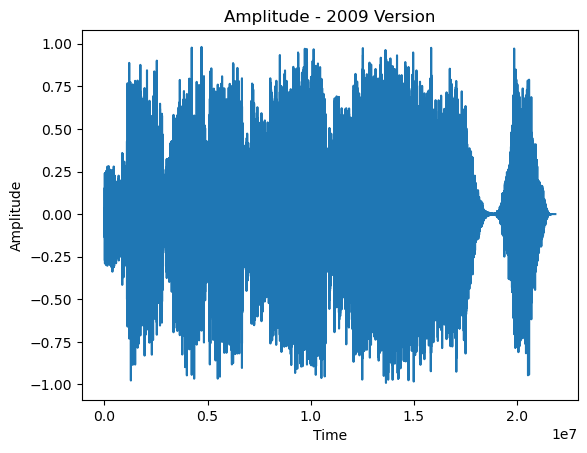

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(amplitude_2009)

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Amplitude - 2009 Version')

plt.show()

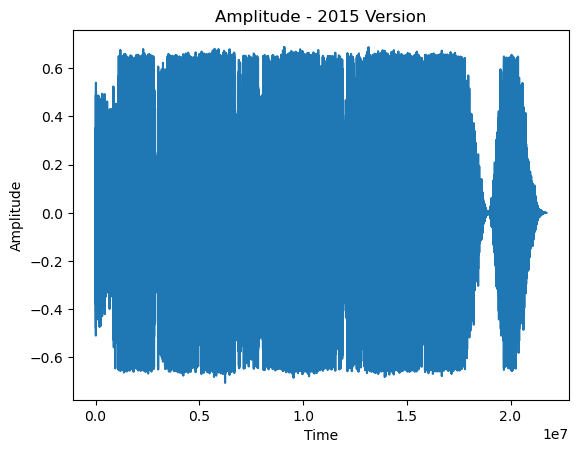

In [28]:
#Now the 2015 version:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(amplitude_2015)

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Amplitude - 2015 Version')

plt.show()

Wow, you can really see how 'compressed' the 2015 version is compared to the 2009 version. The 2015 version hits the same same (loud) level over
and over and over again, while the 2009 version has a lot more nuance. 

2. Let's visualize the difference in mean amplitude value

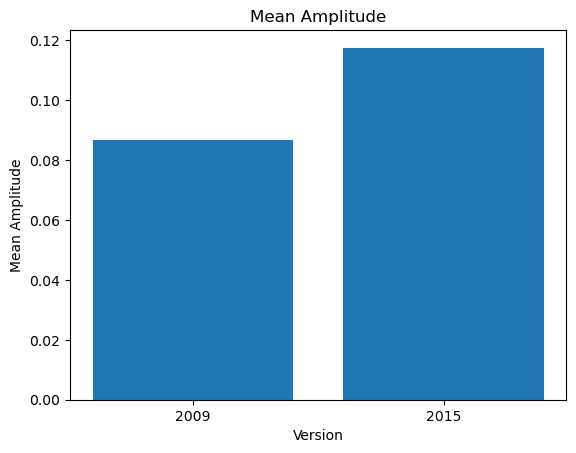

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bar chart with two bars
plt.bar(['2009', '2015'], [np.mean(amplitude_2009_No_Silence_Abs), np.mean(amplitude_2015_No_Silence_Abs)])

# Set the title and axis labels
plt.title('Mean Amplitude')
plt.xlabel('Version')
plt.ylabel('Mean Amplitude')

# Show the plot
plt.show()

In conclusion, when we compare the amplitude of the 2009 and 2015 versions of "Strawberry Fields Forever", we can see that the newer version (2015) was made to be louder. We can see this through both the visualization of the amplitude over the course of the song an also through the comparison of the mean amplitude of each version. 